# PHASE1

### Data Intensive Computing CSE 587

###### Phase #:1 Hemant Kumar Das 50356421 Mayank Lara 50351114

##### Project Name: Hotel Room Price Prediction in NYC

The issue we are trying to address is to predict the hotel room prices in NYC based on various features like the neighborhood group, room type, longitude, number of reviews, and others.
Since there is no convenient platform as of now for the customers to check hotel prices in the entire city based on the specific requirements such as calculated host listings count and its availability around the year, this model would provide a platform to the customers to book hotel rooms based on their desideratum.


##### Name of the Data: 2019 Hotel Room Data NYC

Source: Kaggle,
Time Period: 2009-2019,
Scope: Global,
Data Unit: NY, USA

##### Table showing column and its description


| Column                                 | Description                              |
|----------------------------------------|------------------------------------------|
| id                                     | Unique Identifier                        |
| name                                   | Name of the hotel                        |
| host_id                                | Unique id of the host                    |
| host_name                              | Name of the host                         |
| neighbourhood_group                    | Name of the grouped neighbourhood        |
| neighbourhood                          | Name of the neighbourhood                |
| latitude                               | Latitude of the location                 |
| longitude                              | Longitude of the location                |
| room_type                              | Type of the room in hotel                |
| price                                  | Price of the room                        |
| minimum_nights                         | Minimum nights required to book          |
| number_of_reviews                      | Number of reviews of the hotel room      |
| last_review                            | Last review date of the room             |
| reviews_per_month                      | Number of reviews per month of the room  |
| calculated_host_listings_count         | Number of hosts listing of the hotel     |
| availability_365                       | Availability of the room around the year |

###### Conclusion: To predict the hotel room prices based on the features

In [1]:
#Importing the libraries
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
#importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the dataset
df=pd.read_csv("AB_NYC_2019.csv")

In [3]:
#Checking the initial rows of the dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [4]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48896 entries, 0 to 48895
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48896 non-null  int64  
 1   name                            48880 non-null  object 
 2   host_id                         48896 non-null  int64  
 3   host_name                       48875 non-null  object 
 4   neighbourhood_group             48896 non-null  object 
 5   neighbourhood                   48896 non-null  object 
 6   latitude                        48896 non-null  float64
 7   longitude                       48896 non-null  float64
 8   room_type                       48896 non-null  object 
 9   price                           48896 non-null  int64  
 10  minimum_nights                  48896 non-null  int64  
 11  number_of_reviews               48896 non-null  int64  
 12  last_review                     

In [5]:
#Checking for duplicate rows based on the features below
df1=df[df.duplicated(['name', 'host_name','host_id','neighbourhood_group','latitude','longitude','calculated_host_listings_count','neighbourhood','price','room_type','minimum_nights','availability_365'])]

In [6]:
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
39,12048,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0
76,18152,2 bedroom - Upper East Side-great for kids,61491,D,Manhattan,Upper East Side,40.77065,-73.95269,Entire home/apt,250,2,66,30-03-2019,0.57,2,231
106,25235,loft bed - near transportation-15min to times sq,32294,Ssameer Or Trip,Manhattan,Harlem,40.82279,-73.95139,Private room,60,3,11,03-01-2019,0.87,3,219
201,53477,NYC fabulous views Manhattan's eye,115157,Nimo,Manhattan,Kips Bay,40.74294,-73.98009,Entire home/apt,199,5,38,02-12-2015,0.38,1,260
2217,1040120,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365


In [7]:
#Operation 1: Dropping the duplicate rows
df.drop_duplicates(subset =['name', 'host_name','host_id','neighbourhood_group','latitude','longitude','calculated_host_listings_count','neighbourhood','price','room_type','minimum_nights','availability_365'],keep = False, inplace = True)

In [8]:
#Checking if rows are dropped, we can see that the rows are dropped from 48896 to 48871
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48871 entries, 1 to 48895
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48871 non-null  int64  
 1   name                            48855 non-null  object 
 2   host_id                         48871 non-null  int64  
 3   host_name                       48850 non-null  object 
 4   neighbourhood_group             48871 non-null  object 
 5   neighbourhood                   48871 non-null  object 
 6   latitude                        48871 non-null  float64
 7   longitude                       48871 non-null  float64
 8   room_type                       48871 non-null  object 
 9   price                           48871 non-null  int64  
 10  minimum_nights                  48871 non-null  int64  
 11  number_of_reviews               48871 non-null  int64  
 12  last_review                     

In [9]:
#Operation 2: Removing the old records based on last review date
df['last_review'] = pd.to_datetime(df['last_review'])

In [10]:
#Sorting the dataset based on last review date
df=df.sort_values(by='last_review')

In [11]:
#printing the dataset
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
317,74860,"Sunlit and Cozy Williamsburg/Greenpoint, Brooklyn",394752,Allison,Brooklyn,Greenpoint,40.72488,-73.95018,Private room,55,2,1,2011-03-28,0.01,1,0
163,40039,Luxurious Condo in DUBMO with View,171851,Henry,Brooklyn,DUMBO,40.70207,-73.98571,Private room,250,3,14,2011-04-25,0.13,1,189
125,28396,Modern Apt with Spectacular Views,6197784,Jo,Brooklyn,Williamsburg,40.71923,-73.96468,Private room,90,1,9,2011-09-18,0.08,1,245
143,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,40.74028,-73.83168,Private room,140,2,1,2011-09-19,0.01,1,1
123,27883,East Village Sanctuary,120223,Jen,Manhattan,East Village,40.72245,-73.98527,Entire home/apt,100,4,25,2011-10-12,0.23,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48891,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9
48892,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36
48893,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27
48894,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2


In [12]:
#Considering only the records which are starting from 2000 index, since the records before are quite old and futile.
df = df.iloc[2000:]

In [13]:
#checking the data set if the old records are removed.
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5016,3605493,Spacious Private Apt. Near All!,16809056,Jason,Queens,Astoria,40.75997,-73.90926,Entire home/apt,120,3,29,2016-02-08,0.55,1,0
15989,12926849,Comfy Room for May,28680349,Bryan,Brooklyn,Greenpoint,40.72577,-73.94981,Private room,90,1,7,2016-02-08,0.19,1,0
16712,13362486,Bedroom in Park Slope Apartment,75828613,Colin,Brooklyn,Park Slope,40.67148,-73.97786,Private room,40,3,2,2016-02-08,0.06,1,0
17577,13822434,Private Room in Hamilton Heights,14078461,Emma,Manhattan,Harlem,40.82421,-73.95426,Private room,40,7,1,2016-02-08,0.03,1,0
6875,4909080,2 Stops to MANHATTAN!,25276263,Charles,Brooklyn,Boerum Hill,40.68810,-73.98699,Entire home/apt,500,6,29,2016-02-09,0.53,1,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48891,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9
48892,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36
48893,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27
48894,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2


In [14]:
#Operation 3: Dropping all the unnecessary columns required to predict
df=df.drop(['id','name','host_id','host_name','neighbourhood','last_review','calculated_host_listings_count'], axis = 1)

In [15]:
#Check if columns are dropped
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
5016,Queens,40.75997,-73.90926,Entire home/apt,120,3,29,0.55,0
15989,Brooklyn,40.72577,-73.94981,Private room,90,1,7,0.19,0
16712,Brooklyn,40.67148,-73.97786,Private room,40,3,2,0.06,0
17577,Manhattan,40.82421,-73.95426,Private room,40,7,1,0.03,0
6875,Brooklyn,40.68810,-73.98699,Entire home/apt,500,6,29,0.53,89


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46871 entries, 5016 to 48895
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  46871 non-null  object 
 1   latitude             46871 non-null  float64
 2   longitude            46871 non-null  float64
 3   room_type            46871 non-null  object 
 4   price                46871 non-null  int64  
 5   minimum_nights       46871 non-null  int64  
 6   number_of_reviews    46871 non-null  int64  
 7   reviews_per_month    36822 non-null  float64
 8   availability_365     46871 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 3.6+ MB


In [17]:
#Operation4: Resetting the index, since the index before were jumbled and not in order
df.reset_index(drop=True, inplace=True)

In [18]:
#Printing the dataset
df

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,Queens,40.75997,-73.90926,Entire home/apt,120,3,29,0.55,0
1,Brooklyn,40.72577,-73.94981,Private room,90,1,7,0.19,0
2,Brooklyn,40.67148,-73.97786,Private room,40,3,2,0.06,0
3,Manhattan,40.82421,-73.95426,Private room,40,7,1,0.03,0
4,Brooklyn,40.68810,-73.98699,Entire home/apt,500,6,29,0.53,89
...,...,...,...,...,...,...,...,...,...
46866,Brooklyn,40.67853,-73.94995,Private room,70,2,0,NaN,9
46867,Brooklyn,40.70184,-73.93317,Private room,40,4,0,NaN,36
46868,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,27
46869,Manhattan,40.75751,-73.99112,Shared room,55,1,0,NaN,2


In [19]:
#Operation5: checking what all unique records are there for the neighbourhood_group column
df['neighbourhood_group'].unique()

array(['Queens', 'Brooklyn', 'Manhattan', 'Bronx', 'Staten Island'],
      dtype=object)

In [20]:
df['neighbourhood_group'].value_counts()

Manhattan        20686
Brooklyn         19207
Queens            5527
Bronx             1083
Staten Island      368
Name: neighbourhood_group, dtype: int64

In [21]:
#Categorizing the neighborhood group from 0-4
#

In [22]:
#Replacing the dataset with categorical values from above
cleanup_nums = {"neighbourhood_group":{"Queens": 0, "Brooklyn": 1, "Manhattan":2, "Bronx": 3, "Staten Island":4}}
df=df.replace(cleanup_nums)

In [23]:
df

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,0,40.75997,-73.90926,Entire home/apt,120,3,29,0.55,0
1,1,40.72577,-73.94981,Private room,90,1,7,0.19,0
2,1,40.67148,-73.97786,Private room,40,3,2,0.06,0
3,2,40.82421,-73.95426,Private room,40,7,1,0.03,0
4,1,40.68810,-73.98699,Entire home/apt,500,6,29,0.53,89
...,...,...,...,...,...,...,...,...,...
46866,1,40.67853,-73.94995,Private room,70,2,0,NaN,9
46867,1,40.70184,-73.93317,Private room,40,4,0,NaN,36
46868,2,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,27
46869,2,40.75751,-73.99112,Shared room,55,1,0,NaN,2


In [24]:
#Operation6: Categorizing the room type group from 0-2
df['room_type'].value_counts()

Entire home/apt    24321
Private room       21425
Shared room         1125
Name: room_type, dtype: int64

In [25]:
#Replacing the dataset with categorical values from above
cleanup_nums1 = {"room_type":{"Entire home/apt": 0, "Private room": 1, "Shared room":2}}
df=df.replace(cleanup_nums1)

In [26]:
df

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,0,40.75997,-73.90926,0,120,3,29,0.55,0
1,1,40.72577,-73.94981,1,90,1,7,0.19,0
2,1,40.67148,-73.97786,1,40,3,2,0.06,0
3,2,40.82421,-73.95426,1,40,7,1,0.03,0
4,1,40.68810,-73.98699,0,500,6,29,0.53,89
...,...,...,...,...,...,...,...,...,...
46866,1,40.67853,-73.94995,1,70,2,0,NaN,9
46867,1,40.70184,-73.93317,1,40,4,0,NaN,36
46868,2,40.81475,-73.94867,0,115,10,0,NaN,27
46869,2,40.75751,-73.99112,2,55,1,0,NaN,2


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46871 entries, 0 to 46870
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  46871 non-null  int64  
 1   latitude             46871 non-null  float64
 2   longitude            46871 non-null  float64
 3   room_type            46871 non-null  int64  
 4   price                46871 non-null  int64  
 5   minimum_nights       46871 non-null  int64  
 6   number_of_reviews    46871 non-null  int64  
 7   reviews_per_month    36822 non-null  float64
 8   availability_365     46871 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 3.2 MB


In [28]:
#Operation7: Filling all the reviews per month which is empty with 0, since the number of reviews which are empty refers to zero.
df['reviews_per_month']=df['reviews_per_month'].fillna(0)

In [29]:
df

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,0,40.75997,-73.90926,0,120,3,29,0.55,0
1,1,40.72577,-73.94981,1,90,1,7,0.19,0
2,1,40.67148,-73.97786,1,40,3,2,0.06,0
3,2,40.82421,-73.95426,1,40,7,1,0.03,0
4,1,40.68810,-73.98699,0,500,6,29,0.53,89
...,...,...,...,...,...,...,...,...,...
46866,1,40.67853,-73.94995,1,70,2,0,0.00,9
46867,1,40.70184,-73.93317,1,40,4,0,0.00,36
46868,2,40.81475,-73.94867,0,115,10,0,0.00,27
46869,2,40.75751,-73.99112,2,55,1,0,0.00,2


In [30]:
#Operation8: Calculation of Variance Inflation Factor to check for multi-collinearity
vif_data = pd.DataFrame() 
vif_data["feature"] = df.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(df.values, i) 
                          for i in range(len(df.columns))]

In [31]:
vif_data

,feature,VIF
0,neighbourhood_group,4.696163
1,latitude,442948.168397
2,longitude,442360.983132
3,room_type,2.039958
4,price,1.577951
5,minimum_nights,1.190594
6,number_of_reviews,1.974991
7,reviews_per_month,2.325409
8,availability_365,1.908504


In [32]:
#Dropping highly correlated column 'latitude' which have high VIF
df=df.drop(['latitude'],axis=1)

In [33]:
df.head()

,neighbourhood_group,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,0,-73.90926,0,120,3,29,0.55,0
1,1,-73.94981,1,90,1,7,0.19,0
2,1,-73.97786,1,40,3,2,0.06,0
3,2,-73.95426,1,40,7,1,0.03,0
4,1,-73.98699,0,500,6,29,0.53,89


In [34]:
#Checking VIF again to ensure there is no highly correlated column
vif_data = pd.DataFrame() 
vif_data["feature"] = df.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(df.values, i) 
                          for i in range(len(df.columns))]

In [35]:
#Print the vif for each feature
vif_data

,feature,VIF
0,neighbourhood_group,4.552756
1,longitude,7.571013
2,room_type,2.022808
3,price,1.576591
4,minimum_nights,1.190594
5,number_of_reviews,1.974350
6,reviews_per_month,2.320409
7,availability_365,1.907934


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46871 entries, 0 to 46870
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  46871 non-null  int64  
 1   longitude            46871 non-null  float64
 2   room_type            46871 non-null  int64  
 3   price                46871 non-null  int64  
 4   minimum_nights       46871 non-null  int64  
 5   number_of_reviews    46871 non-null  int64  
 6   reviews_per_month    46871 non-null  float64
 7   availability_365     46871 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.9 MB


In [37]:
df

,neighbourhood_group,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,0,-73.90926,0,120,3,29,0.55,0
1,1,-73.94981,1,90,1,7,0.19,0
2,1,-73.97786,1,40,3,2,0.06,0
3,2,-73.95426,1,40,7,1,0.03,0
4,1,-73.98699,0,500,6,29,0.53,89
...,...,...,...,...,...,...,...,...
46866,1,-73.94995,1,70,2,0,0.00,9
46867,1,-73.93317,1,40,4,0,0.00,36
46868,2,-73.94867,0,115,10,0,0.00,27
46869,2,-73.99112,2,55,1,0,0.00,2


In [38]:
#Operation9: Detecting outliners using Z Score
from scipy import stats
import numpy as np


In [39]:
z3=np.where(df['price']>350)

In [40]:
l2 = [list(x) for x in z3]

In [41]:
flatList = [ item for elem in l2 for item in elem]

In [42]:
flatList

[4,
 24,
 77,
 112,
 134,
 142,
 175,
 255,
 263,
 329,
 446,
 455,
 524,
 532,
 559,
 566,
 568,
 632,
 654,
 682,
 692,
 816,
 839,
 907,
 909,
 922,
 994,
 1037,
 1069,
 1073,
 1084,
 1092,
 1096,
 1099,
 1157,
 1252,
 1266,
 1299,
 1306,
 1363,
 1394,
 1436,
 1449,
 1475,
 1593,
 1632,
 1633,
 1634,
 1651,
 1658,
 1694,
 1710,
 1751,
 1785,
 1793,
 1837,
 1858,
 1901,
 1935,
 1956,
 1988,
 2033,
 2042,
 2055,
 2067,
 2069,
 2070,
 2072,
 2074,
 2104,
 2132,
 2142,
 2154,
 2161,
 2167,
 2222,
 2240,
 2242,
 2258,
 2268,
 2271,
 2303,
 2307,
 2313,
 2328,
 2336,
 2348,
 2354,
 2438,
 2593,
 2601,
 2628,
 2639,
 2701,
 2712,
 2713,
 2737,
 2762,
 2816,
 2819,
 2821,
 2829,
 2897,
 2942,
 2952,
 3026,
 3061,
 3122,
 3130,
 3144,
 3171,
 3176,
 3200,
 3240,
 3290,
 3324,
 3413,
 3469,
 3493,
 3547,
 3567,
 3599,
 3621,
 3629,
 3723,
 3772,
 3876,
 3879,
 3888,
 3965,
 3971,
 3992,
 4102,
 4127,
 4150,
 4177,
 4254,
 4440,
 4450,
 4492,
 4505,
 4514,
 4530,
 4611,
 4615,
 4648,
 4700,
 4

In [43]:
df = df.drop(flatList);

# Phase 2

Course-: CSE 587 DATA INTENSIVE COMPUTING

The issue we are trying to address is to predict the hotel room prices in NYC based on various features like the neighborhood group, room type, longitude, number of reviews, and others. Since there is no convenient platform as of now for the customers to check hotel prices in the entire city based on the specific requirements such as calculated host listings count and its availability around the year, this model would provide a platform to the customers to book hotel rooms based on their desideratum.

After getting our cleaned data we have selected the columns on which we want to build our model. We have checked for outliers and performed various other operations on the data to get it cleaned.The next step is to perform EDA(Exploratory Data Analysis) in order to derive insights from my data.

In [44]:
#This is our final data after cleaning process.
df.head() 

,neighbourhood_group,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,0,-73.90926,0,120,3,29,0.55,0
1,1,-73.94981,1,90,1,7,0.19,0
2,1,-73.97786,1,40,3,2,0.06,0
3,2,-73.95426,1,40,7,1,0.03,0
5,1,-73.95903,1,62,4,12,0.24,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44501 entries, 0 to 46870
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  44501 non-null  int64  
 1   longitude            44501 non-null  float64
 2   room_type            44501 non-null  int64  
 3   price                44501 non-null  int64  
 4   minimum_nights       44501 non-null  int64  
 5   number_of_reviews    44501 non-null  int64  
 6   reviews_per_month    44501 non-null  float64
 7   availability_365     44501 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 3.1 MB


In [46]:
#phase2
#operation1
c1=df.corr()
c1

,neighbourhood_group,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
neighbourhood_group,1.000000,-0.563231,-0.107161,0.232157,0.052933,-0.031481,-0.064273,-0.005642
longitude,-0.563231,1.000000,0.171260,-0.303324,-0.066926,0.051512,0.137208,0.091748
room_type,-0.107161,0.171260,1.000000,-0.597218,-0.075224,-0.005166,0.023471,0.037959
price,0.232157,-0.303324,-0.597218,1.000000,0.029783,-0.034959,-0.050841,0.069994
minimum_nights,0.052933,-0.066926,-0.075224,0.029783,1.000000,-0.089382,-0.138141,0.147836
number_of_reviews,-0.031481,0.051512,-0.005166,-0.034959,-0.089382,1.000000,0.588649,0.174494
reviews_per_month,-0.064273,0.137208,0.023471,-0.050841,-0.138141,0.588649,1.000000,0.158974
availability_365,-0.005642,0.091748,0.037959,0.069994,0.147836,0.174494,0.158974,1.000000


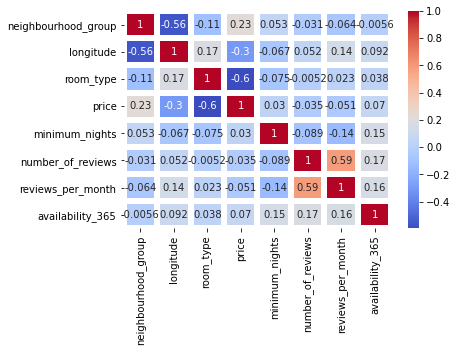

In [47]:
sns.heatmap(c1,annot=True,cmap="coolwarm",linewidth=5)

This heatmap gives us correlation values between every column of my dataset. If the value is very close to -1 or 1 we need to remove one of the column of the two correlated cloumns(other than target variable 'price'). If we have highly correlated data then my linear regression (which I am planning to do) will have incorrect values in coefficients. If correlation value is near to 0 then we have un-correlated data which is desired for features other than target variable. Here, we do not have highly correlated data other han correlation with 'price'. So all columns will be considered for model building.

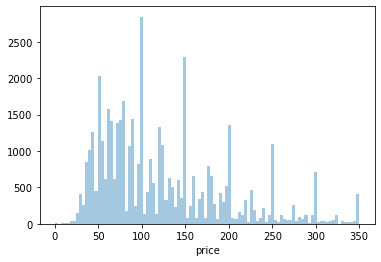

In [48]:
#phase2
#operation2
sns.distplot(df['price'],bins=100,kde=False)

The analysis on price is very important(this will be my Y value in linear regression or "what i am trying to predict"). Using a distplot to draw insight that most of my price value lie in the range of 100$. Only a few of the data lies beyond 200. Customers can get insights of the price they need to pay for staying at a hotel in NYC.

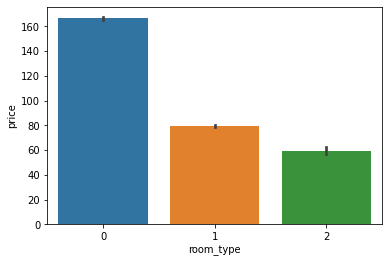

In [49]:
#phase2
#operation3
sns.barplot(x='room_type',y='price',data=df,estimator=np.mean)

"Entire home/apt": 0, "Private room": 1, "Shared room":2.
Using this barplot we can derive insights on the room_type feature.The Y axis has the mean price and X axis has the room types. We can see that Entire home/apt/villa are costlier that Private and shared rooms which is how it should be. 

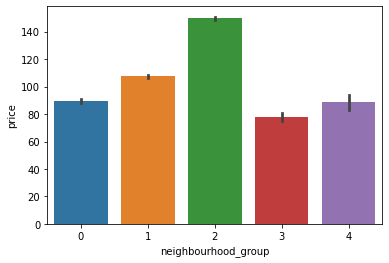

In [50]:
#phase2
#operation4
sns.barplot(data=df,x='neighbourhood_group',y='price',estimator=np.mean)

"Queens": 0, "Brooklyn": 1, "Manhattan":2, "Bronx": 3, "Staten Island":4. Using this barplot we can derive insights on the neightbourhood_group feature.The Y axis has the mean price and X axis has the neighbourhood_groups. We can see that Manhattan is the costliest neighbourhood group. All others lie in the same range. Therefore, price for a hotel in Manhattan will be costlier than other areas of NYC.

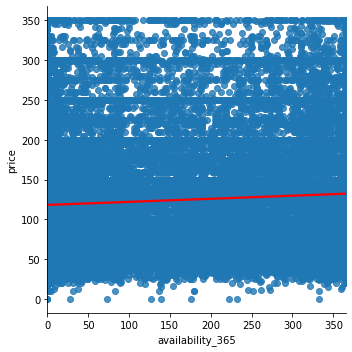

In [51]:
#phase2
#operation5
sns.lmplot(data=df,x='availability_365',y='price',line_kws={'color': 'red'})

This graph gives us a scatter plot along with a regression line(which is has a positive slope). From this we draw insights that if the availability is high the prices also go high. This seems to be a abnormality but this could be due to many factors. If hotel availability is high then we can conclude that prices are also high because hotels are trying to maximize profit by keeping prices high.

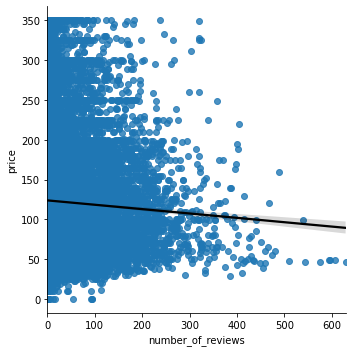

In [52]:
#phase2
#operation6
sns.lmplot(data=df,x='number_of_reviews',y='price',line_kws={'color': 'black'})

This graph gives us a scatter plot along with a regression line(which is has a negative slope). From this we draw insights that if the number_of_reviews is high the prices go down slightly.This seems to be valid as more and people review the hotels might provide discounts and prices may go down but not much.

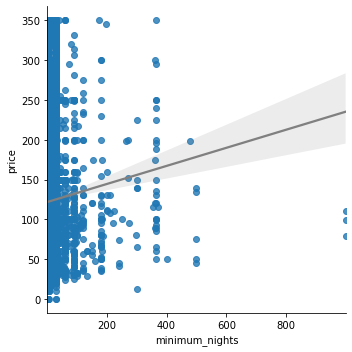

In [53]:
#phase2
#operation7
sns.lmplot(data=df,x='minimum_nights',y='price',line_kws={'color': 'grey'})

This graph gives us a scatter plot along with a regression line(which is has a positive slope). From this we draw insights that if the customer is satying for longer durations then the prices go up slightly.This seems to be valid as longer duration stays can be costlier.

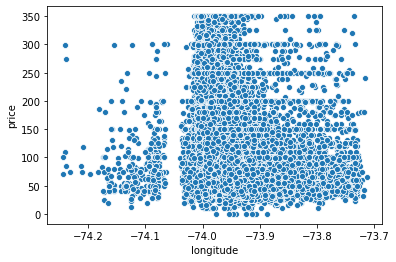

In [54]:
#phase2
#operation8
sns.scatterplot(data=df,x='longitude',y='price')

This graph gives us a scatter plot of longitudes vs price. We can see that costliest rooms are available when longitude is between -74 and -73.9. This area has the costliest places to stay. If you check the longitude of Manhattan it is -73.97 and Brooklyn has -73.94. We conclude that costliest hotels lie in Manhattan and Brooklyn.

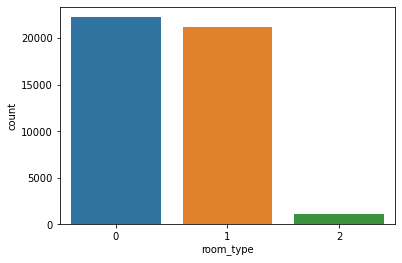

In [55]:
#phase2
#operation9
sns.countplot(df['room_type'])

Entire home/apt": 0, "Private room": 1, "Shared room":2. From this we can see that there are very few rows with 'Shared Type' in 'room_type'. If this would have been a classification problem with target variable as 'room type' then my data would be an unbalanced datset and we could use upsampling and downsampling to correct the data. But since this 'room_type' in my dataset is just a feature and not the target variable we can still go ahead with this dataset. This also gives us an insight that not many hotels which provide shared rooms are available.

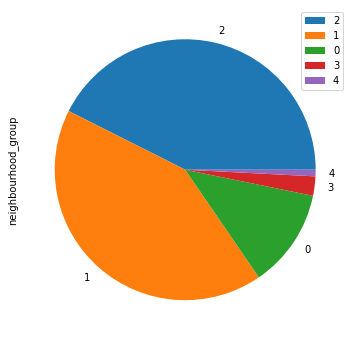

In [56]:
#phase2
#operation10
df.neighbourhood_group.value_counts(normalize=True)

#plot the pie chart of neighbourhood_group categories
df.neighbourhood_group.value_counts(normalize=True).plot.pie(figsize=(6,6),legend=True)
plt.show()

"Queens": 0, "Brooklyn": 1, "Manhattan":2, "Bronx": 3, "Staten Island":4. From this we can see that there are very few rows with 'Bronx' and 'Staten Island' in 'Neighbourhood_group' feature. We can conclude that the number of hotels in 'Bronx' and 'Staten Island' are fewer as compared to 'Manhattan','Brooklyn' and 'Queens'. Hotels are mainly located in 'Manhattan' or 'Brooklyn'.

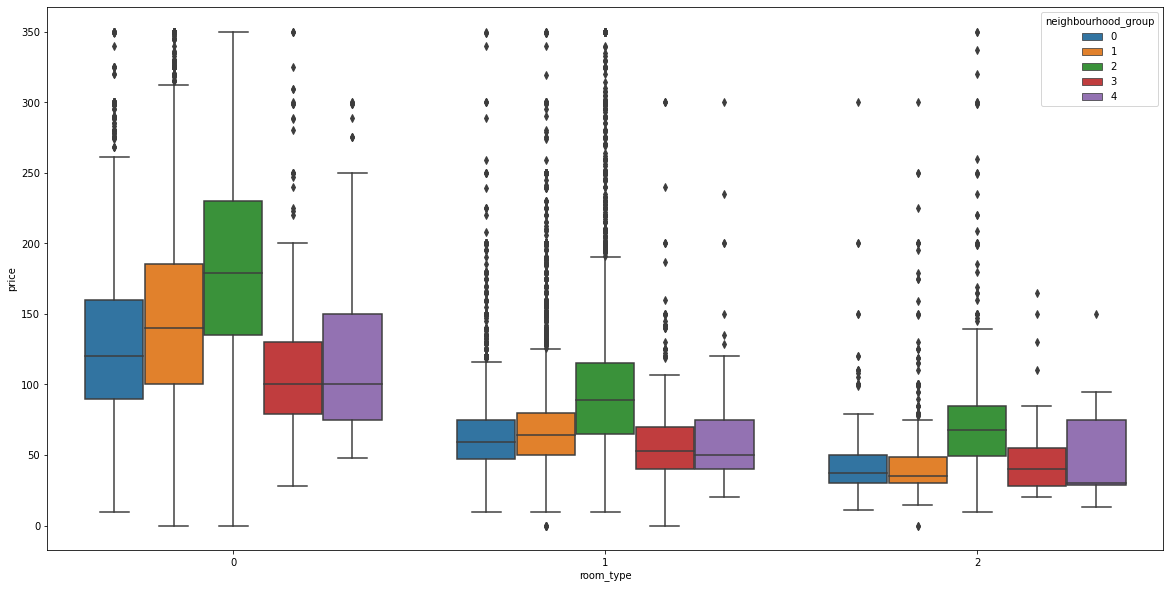

In [57]:
#phase2
#operation11
plt.figure(figsize=(20,10))
sns.boxplot(x='room_type',y='price',data=df,hue='neighbourhood_group')

This is a box plot which gives us information about the median price and inter-quartile range of the different types of rooms as well as the neighbourhood grops they are in. We can see that the median price for Neighbour hood 2 ('Manhattan) is greater as compared to other neighbourhoods of NYC. We can also see that the median price for room type 0 (Entire home/apt) is greater than other room types. So Entire 'home/ apt' in 'Manhattan' will most likely be a costly deal.

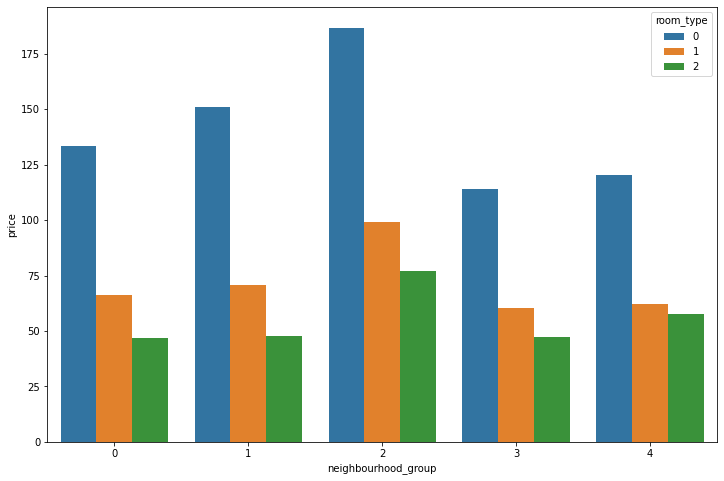

In [58]:
#phase2
#operation12
plt.figure(figsize=(12, 8))
sns.barplot(df['neighbourhood_group'], df['price'], hue=df['room_type'], ci=None)

This is a bar plot which gives us information about the mean price of the different types of rooms as well as the neighbourhood grops they are in. We can see that the mean price for Neighbour hood 2 ('Manhattan) is greater as compared to other neighbourhoods of NYC. We can also see that the median price for room type 0 (Entire home/apt) is greater than other room types. So Entire 'home/ apt' in 'Manhattan' will most likely be a costly deal.

## Phase 3

Course-: CSE 587 DATA INTENSIVE COMPUTING

The issue we are trying to address is to predict the hotel room prices in NYC based on various features like the neighborhood group, room type, longitude, number of reviews, and others. Since there is no convenient platform as of now for the customers to check hotel prices in the entire city based on the specific requirements such as calculated host listings count and its availability around the year, this model would provide a platform to the customers to book hotel rooms based on their desideratum.

After getting our cleaned data we have selected the columns on which we want to build our model. We have checked for outliers and performed various other operations on the data to get it cleaned. We also performed EDA(Exploratory Data Analysis) in order to derive insights from my data. The next step is the model building phase using machine learning algorithmns.

HEMANT KUMAR DAS 50356421 MAYANK LARA 50351114

#### 3 Cleaned Datasets
Display the cleaned dataset after phase 1


In [59]:
df.head()

,neighbourhood_group,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,0,-73.90926,0,120,3,29,0.55,0
1,1,-73.94981,1,90,1,7,0.19,0
2,1,-73.97786,1,40,3,2,0.06,0
3,2,-73.95426,1,40,7,1,0.03,0
5,1,-73.95903,1,62,4,12,0.24,0


#### 4 Modeling  
Please take a look at https://scikit-learn.org/stable/. First of all, understand what is the problem of your research such as classification problem, regression problem, clustering problem...... Then choose your algorithm. For each algorithm, you need to answer the following 5 questions. We give the example answer in section 6. 

In [60]:
X = df.loc[:, df.columns != 'price']
Y = df[['price']]

In [61]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

In [62]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [63]:
X_train

,neighbourhood_group,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365
10164,4,-74.07722,1,1,4,0.34,29
22662,2,-73.96697,1,3,6,0.15,193
29126,1,-73.94964,0,2,26,2.26,315
19775,2,-73.99318,0,1,4,4.00,98
33368,1,-73.94961,1,1,3,3.00,87
...,...,...,...,...,...,...,...
46044,1,-73.88179,1,3,0,0.00,23
33881,1,-73.96493,1,1,75,4.59,81
5355,2,-74.00206,0,4,6,0.24,0
12617,2,-73.94585,1,14,2,1.71,0


In [64]:
#Scaling X_train,X_val and X_test between 0 and 1
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X_train)
X_test_minmax=mm_scaler.transform(X_test)

## 4.1

In [66]:
import statsmodels.api as sm
result = sm.OLS(Y_train, X_train_minmax).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.819
Model:                            OLS   Adj. R-squared (uncentered):              0.819
Method:                 Least Squares   F-statistic:                          2.299e+04
Date:                Sat, 10 Apr 2021   Prob (F-statistic):                        0.00
Time:                        12:16:41   Log-Likelihood:                     -1.9657e+05
No. Observations:               35600   AIC:                                  3.931e+05
Df Residuals:                   35593   BIC:                                  3.932e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           142.2184      1.442     98.647      0.000     139.393     145.044
x2           191.0216      1.298    147.171      0.000     188.478     193.566
x3          -148.7781      1.194   -124.578      0.000    -151.119    -146.437
x4           -96.1625     16.811     -5.720      0.000    -129.113     -63.212
x5           -25.1950      5.441     -4.631      0.000     -35.859     -14.531
x6           -71.5825     14.477     -4.945      0.000     -99.958     -43.207
x7            24.0004      0.931     25.766      0.000      22.175      25.826
==============================================================================
Omnibus:                     3727.977   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6419.951
Skew:                           0.733   Prob(JB):                         0.00
Kurtosis:                       4.477   Cond. No.                         42.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
Y_pred=result.predict(X_test_minmax)

In [68]:
#r2(r square for the test data) 
from sklearn.metrics import r2_score
r2=r2_score(Y_test,Y_pred)

In [69]:
r2

0.30864784515876753

In [70]:
r1 = metrics.mean_squared_error(Y_test,Y_pred)

In [71]:
r1

3587.860262749826

In [72]:
#rootmean squared error
np.sqrt(r1)

59.8987500933853

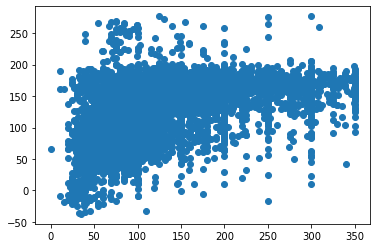

In [73]:
plt.scatter(Y_test,Y_pred)

Q: What assumptions need to be verified at this step?

A: As the project goal suggest we need to predict the price of the hotel for a customer on the basis of various other factors which will be taken as a input and will be provided to the model for price prediction. We assume the customer puts all the data which are required in order to predict a price for the hotel.

Q: What algorithm did you choose?
    
A: OLS Regression

Q: Why you choose this algorithm?

A: After observing the data, we see that the price column is a continous data and we need regression model in order to predict a price. So we choose the Ordinary Least Square Regression as my first algorithm. This is a very popular algorithm and very easy to comprehend.

Q: What metric can measure the quality of your algorithm?

A: I would use Root Mean Squared Error (RMSE) to evaluate the regression algorithm.

Q: What is the outcome?

A: I divided my data into train dataset (contains 80% of data) and test dataset (contains 20% of data).  We get an R2 (R square value of 0.819) on my training data. I used the test data to evaluate the outcome of OLS algorithm. The RMSE parameter will give me how good the model is performing. We get an RMSE of 59.8. 

Q: Analysis and discussion:
A: According the difference in values Y_test and Y_pred data, we could conclude that when we are predicting the hotel price on the basis of all given input parameters we are getting an error of around 59.8 $.

## 4.2

In [74]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
regressor = DecisionTreeRegressor(random_state=0)

In [76]:
regressor.fit(X_train_minmax,Y_train)

DecisionTreeRegressor(random_state=0)

In [77]:
Y_pred2 = regressor.predict(X_test_minmax)

In [78]:
r1=metrics.mean_squared_error(Y_test,Y_pred2)

In [79]:
#rootmean squared error
np.sqrt(r1)

70.08195304556372

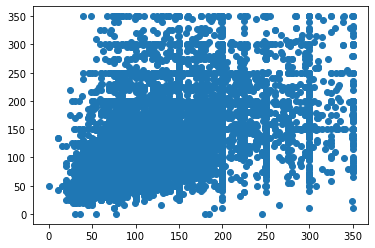

In [80]:
plt.scatter(Y_test,Y_pred2)

Q: What assumptions need to be verified at this step?

A: As the project goal suggest we need to predict the price of the hotel for a customer on the basis of various other factors which will be taken as a input and will be provided to the model for price prediction. We assume the customer puts all the data which are required in order to predict a price for the hotel.

Q: What algorithm did you choose?
    
A: Decision Tree Regression

Q: Why you choose this algorithm?

A: After observing the data, we see that the price column is a continous data and we need a regression model in order to predict a price. So we choose the Decision Tree Regression as my second algorithm. This is a  also a very popular algorithm and easy to comprehend.

Q: What metric can measure the quality of your algorithm?

A: I would use Root Mean Squared Error (RMSE) to evaluate the regression algorithm.

Q: What is the outcome?

A: I divided my data into train dataset (contains 80% of data) and test dataset (contains 20% of data). I used the test data to evaluate the outcome of Decision Tree algorithm. The RMSE parameter will give me how good the model is performing. We get an RMSE of 70.0. 

Q: Analysis and discussion:
A: According the difference in values Y_test and Y_pred data, we could conclude that when we are predicting the hotel price on the basis of all given input parameters we are getting an error of around 70.0 $. Performance of OLS is better than desion tree regressor. 

## 4.3

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [83]:
rf.fit(X_train_minmax,Y_train);

<ipython-input-83-5e06f985d152>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_minmax,Y_train);


In [84]:
predictions = rf.predict(X_test_minmax)

In [85]:
r1=metrics.mean_squared_error(Y_test,predictions)

In [86]:
#rootmean squared error
np.sqrt(r1)

50.24258457302087

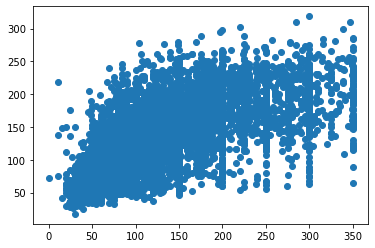

In [87]:
plt.scatter(Y_test,predictions)

Q: What assumptions need to be verified at this step?

A: As the project goal suggest we need to predict the price of the hotel for a customer on the basis of various other factors which will be taken as a input and will be provided to the model for price prediction. We assume the customer puts all the data which are required in order to predict a price for the hotel.

Q: What algorithm did you choose?
    
A: Random Forest Regression

Q: Why you choose this algorithm?

A: After observing the data, we see that the price column is a continous data and we need a regression model in order to predict a price. So we choose the Random Forest Regression as my third algorithm. This is a  also a very popular algorithm and uses many decison trees to compute a result. The number of trees you want to use can be provided as a hyperparamter.

Q: What metric can measure the quality of your algorithm?

A: I would use Root Mean Squared Error (RMSE) to evaluate the regression algorithm.

Q: What is the outcome?

A: I divided my data into train dataset (contains 80% of data) and test dataset (contains 20% of data). I used the test data to evaluate the outcome of Random Forest algorithm. The RMSE parameter will give me how good the model is performing. We get an RMSE of 50.2 . This is a good RMSE as compared to the first two algorithmns.

Q: Analysis and discussion:
A: According the difference in values Y_test and Y_pred data, we could conclude that when we are predicting the hotel price on the basis of all given input parameters we are getting an error of around 50.24 $.

## 4.4

In [88]:
from sklearn import svm

In [89]:
clf = svm.SVR(kernel='rbf')

In [90]:
clf.fit(X_train_minmax,Y_train)

C:\Users\dashe\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [91]:
pred_4 = clf.predict(X_test_minmax)

In [92]:
r1=metrics.mean_squared_error(Y_test,pred_4)

In [93]:
#rootmean squared error
np.sqrt(r1)

52.868578448463154

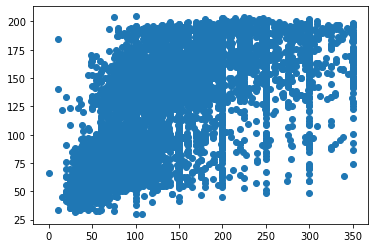

In [94]:
plt.scatter(Y_test,pred_4)

Q: What assumptions need to be verified at this step?

A: As the project goal suggest we need to predict the price of the hotel for a customer on the basis of various other factors which will be taken as a input and will be provided to the model for price prediction. We assume the customer puts all the data which are required in order to predict a price for the hotel.

Q: What algorithm did you choose?
    
A: Support Vector Regression

Q: Why you choose this algorithm?

A: After observing the data, we see that the price column is a continous data and we need a regression model in order to predict a price. So we choose the Support Vector Regression as my fourth algorithm. This is a  also a very popular algorithm for regression as well as classification. It has hyperparametres like kernel which can be given as 'linear' or 'rbf'.

Q: What metric can measure the quality of your algorithm?

A: I would use Root Mean Squared Error (RMSE) to evaluate the regression algorithm.

Q: What is the outcome?

A: I divided my data into train dataset (contains 80% of data) and test dataset (contains 20% of data). I used the test data to evaluate the outcome of Support Vector Regression algorithm. The RMSE parameter will give me how good the model is performing. We get an RMSE of 52.86 . This is a good RMSE as compared to the first two algorithmns but not better than Random Forest Algorithm.

Q: Analysis and discussion:
A: According the difference in values Y_test and Y_pred data, we could conclude that when we are predicting the hotel price on the basis of all given input parameters we are getting an error of around 52.86 $.

## 4.5

In [95]:
import xgboost as xgb
xgb_r = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 100, seed = 123)

In [96]:
import pickle

In [97]:
#pickle dump used for phase5
xgb_r.fit(X_train,Y_train)
pickle.dump(xgb_r,open("XGBoost.sav",'wb'))

[12:17:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [98]:
y_pred5 = xgb_r.predict(X_test)

In [99]:
r1=metrics.mean_squared_error(Y_test,y_pred5)

In [100]:
#rootmean squared error
np.sqrt(r1)

49.33666530493893

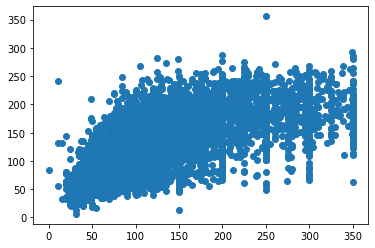

In [101]:
plt.scatter(Y_test,y_pred5)

Q: What assumptions need to be verified at this step?

A: As the project goal suggest we need to predict the price of the hotel for a customer on the basis of various other factors which will be taken as a input and will be provided to the model for price prediction. We assume the customer puts all the data which are required in order to predict a price for the hotel.

Q: What algorithm did you choose?
    
A: XGBoost

Q: Why you choose this algorithm?

A: After observing the data, we see that the price column is a continous data and we need a regression model in order to predict a price. So we choose the XGBoost as my fifth algorithm. This is a  also a very popular algorithm for regression. This is a powerful ensemble boosting technique which most of the times gives us great results.

Q: What metric can measure the quality of your algorithm?

A: I would use Root Mean Squared Error (RMSE) to evaluate the regression algorithm.

Q: What is the outcome?

A: I divided my data into train dataset (contains 80% of data) and test dataset (contains 20% of data). I used the test data to evaluate the outcome of Support Vector Regression algorithm. The RMSE parameter will give me how good the model is performing. We get an RMSE of 49.3. This is the best RMSE as compared to all the algorithms.

Q: Analysis and discussion:
A: According the difference in values Y_test and Y_pred data, we could conclude that when we are predicting the hotel price on the basis of all given input parameters we are getting an error of around 49.3 $.